# Machine Learning Water Table Analysis

In [104]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

In [105]:
df = pd.read_csv("wt_for_ml.csv")

In [106]:
df.head()

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_encoded,region_encoded,recorded_by_encoded,...,water_quality_encoded,quality_group_encoded,quantity_encoded,quantity_group_encoded,source_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded,status_group_encoded,public_meeting_encoded,permit_encoded
0,NaN,-0.964223,-0.560559,0.667174,NaN,NaN,NaN,0.0,17,0,...,6,2,3,3,5,6,5,0,0,0
1,NaN,1.360253,-0.095558,-1.075235,NaN,-0.610483,0.977047,7.0,3,0,...,6,2,1,1,1,4,3,0,1,0
2,NaN,-1.003181,1.585238,-0.582725,NaN,-0.088838,0.816693,7.0,14,0,...,6,2,3,3,7,4,3,2,1,0
3,NaN,1.713759,-1.384494,-0.772896,NaN,2.615988,0.656339,3.0,15,0,...,6,2,0,0,8,1,1,2,1,1
4,NaN,-0.619375,1.581261,-1.803390,NaN,0.363254,0.977047,8.0,12,0,...,6,2,1,1,8,2,1,0,1,0


In [107]:
df.shape

(59399, 26)

In [108]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year,basin_encoded,region_encoded,recorded_by_encoded,...,water_quality_encoded,quality_group_encoded,quantity_encoded,quantity_group_encoded,source_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded,status_group_encoded,public_meeting_encoded,permit_encoded
count,7872.000000,59397.000000,57587.000000,59399.000000,5.230000e+02,37289.000000,38690.000000,59398.000000,59399.000000,59399.0,...,59399.000000,59399.000000,59399.000000,59399.000000,59399.000000,59399.000000,59399.000000,59399.000000,59399.000000,59399.000000
mean,0.000117,0.000004,-0.000051,0.000024,-1.086872e-16,0.000002,0.000071,4.538234,9.835974,0.0,...,5.754289,2.263052,1.325746,1.325746,6.063183,2.573983,2.056129,0.841125,0.914914,0.705500
std,1.000100,1.000015,0.999998,0.999996,1.000000e+00,1.000026,0.999984,2.896886,5.937108,0.0,...,0.900827,0.784274,0.803752,0.803752,2.034203,1.781399,1.378897,0.949796,0.279011,0.455821
min,-0.550678,-1.094082,-2.125701,-2.017385,-9.827165e-01,-1.634453,-2.951625,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.514568,-0.964223,-0.715123,-0.962192,-6.686875e-01,-0.726405,-0.786846,2.000000,4.000000,0.0,...,6.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,-0.369546,-0.431801,-0.055158,0.232384,-4.593349e-01,-0.282040,0.255454,4.000000,10.000000,0.0,...,6.000000,2.000000,1.000000,1.000000,7.000000,2.000000,1.000000,0.000000,1.000000,1.000000
75%,-0.115757,0.938933,0.799204,0.807839,4.827520e-01,0.297565,0.896870,7.000000,15.000000,0.0,...,6.000000,2.000000,2.000000,2.000000,8.000000,4.000000,3.000000,2.000000,1.000000,1.000000
max,6.700269,2.827660,1.992570,1.936864,2.576278e+00,5.282174,1.297755,9.000000,20.000000,0.0,...,7.000000,5.000000,4.000000,4.000000,9.000000,6.000000,5.000000,2.000000,1.000000,1.000000


In [109]:
df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'population', 'construction_year', 'basin_encoded', 'region_encoded',
       'recorded_by_encoded', 'scheme_management_encoded',
       'extraction_type_encoded', 'extraction_type_class_encoded',
       'management_encoded', 'payment_encoded', 'payment_type_encoded',
       'water_quality_encoded', 'quality_group_encoded', 'quantity_encoded',
       'quantity_group_encoded', 'source_encoded', 'waterpoint_type_encoded',
       'waterpoint_type_group_encoded', 'status_group_encoded',
       'public_meeting_encoded', 'permit_encoded'],
      dtype='object')

In [110]:
df.dtypes

amount_tsh                       float64
gps_height                       float64
longitude                        float64
latitude                         float64
num_private                      float64
population                       float64
construction_year                float64
basin_encoded                    float64
region_encoded                     int64
recorded_by_encoded                int64
scheme_management_encoded          int64
extraction_type_encoded            int64
extraction_type_class_encoded      int64
management_encoded                 int64
payment_encoded                    int64
payment_type_encoded               int64
water_quality_encoded              int64
quality_group_encoded              int64
quantity_encoded                   int64
quantity_group_encoded             int64
source_encoded                     int64
waterpoint_type_encoded            int64
waterpoint_type_group_encoded      int64
status_group_encoded               int64
public_meeting_e

### Which Algorithms 
Well the outcome var is multi-class categorical -> multi-class classification

The task description doesn't give any implication of the importance of explainability, but it seems like it would
be important

Also speed vs accuracy, not mentioned but I'd guess accuracy is more important, as long as I can run it within the time limit, which actually isn't that long all of a sudden

Features include continuous and categorical

In no particular order, options:
    1. Elastic-net regularized logistic regression
    2. Boosted Trees
    3. Neural Net
    4. Kernel SVM

I'd also like to do some unsupervised clustering, to see if there's overlap with the outcome var and because it makes pretty graphs ;)
    
I'm gonna go with the boosted trees first, seems like the best bet for these parameters. Does well without a tonne of training data, has good libraries that easily ingest categorical features. And it looks like I only have time for one model

### Split into training set


In [111]:
df.status_group_encoded.value_counts()

0    32260
2    22823
1     4316
Name: status_group_encoded, dtype: int64

In [112]:
# Is there any risk of circularity here? 
# Construction year was the only var that correlated with outcome var with > 0.1 corr coeff
# I could break construction year into categories and split training/test by those but time...

In [114]:
# Split into training and test. 
# TODO validation?
train, test = train_test_split(df, test_size=0.25, random_state=25)
train_y = train['status_group_encoded']
train_x = train.drop(columns=['status_group_encoded'])
test_y = test['status_group_encoded']
test_x = test.drop(columns=['status_group_encoded'])

In [115]:
cat_feats = [x for x in df.columns if '_encoded' in x]
cat_feats.remove('status_group_encoded')

In [116]:
train_x.shape

(44549, 25)

In [117]:
test_y.shape

(14850,)

In [ ]:
# Note that the observations to features ratio is high, well beyond the 10:1 rule of thumb

In [118]:
## Make sure the class balance makes sense in both training and test
# There is imbalance, ideally I'd adjust the training set to be as balanced as possible
# Additionally I'd test outcome with balanced accuracy score
print(test_y.value_counts())
print(train_y.value_counts())

0    8121
2    5644
1    1085
Name: status_group_encoded, dtype: int64
0    24139
2    17179
1     3231
Name: status_group_encoded, dtype: int64


## MODEL 1: Boosted Trees

In [127]:
## Train and run boosted trees LGB

# setup input in the right format
d_train=lgb.Dataset(train_x, label=train_y)

# establish model
lg = lgb.LGBMClassifier(silent=False)

#training the model
params = {"max_depth": 50, "objective" : ["multiclass"], "num_class" : [3], 
          "learning_rate" : 0.1, "num_leaves": 300,  "n_estimators": 100, "nfold":3, "metrics":'multi_error'}
model=lgb.train(params, d_train, 200, categorical_feature = cat_feats)  #training the model on 100 epocs

#prediction on the test dataset
y_pred_1=model.predict(test_x)

#printing the predictions
y_pred_1

array([[9.82397669e-01, 1.78279317e-03, 1.58195379e-02],
       [1.79042408e-01, 1.48604727e-02, 8.06097120e-01],
       [1.69962632e-03, 2.70626201e-04, 9.98029747e-01],
       ...,
       [9.35453858e-01, 2.38360750e-02, 4.07100673e-02],
       [4.70776905e-02, 1.23564412e-03, 9.51686665e-01],
       [7.29373603e-01, 1.32186751e-02, 2.57407722e-01]])

In [128]:
## We receive probabilities for each outcome class
# Take the most likely of these as our outcome
preds = [list(x).index(max(x)) for x in y_pred_1]

In [129]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return metrics.roc_auc_score(y_test, y_pred, average=average)

### RESULTS

In [130]:
## Get AUC 
# .77
multiclass_roc_auc_score(test_y, preds)

0.7671306500775895

In [131]:
## Get Balanced Accuracy Score to account for the class imbalance of the outcome var
# .66
metrics.balanced_accuracy_score(test_y, preds)

0.6595882019266623

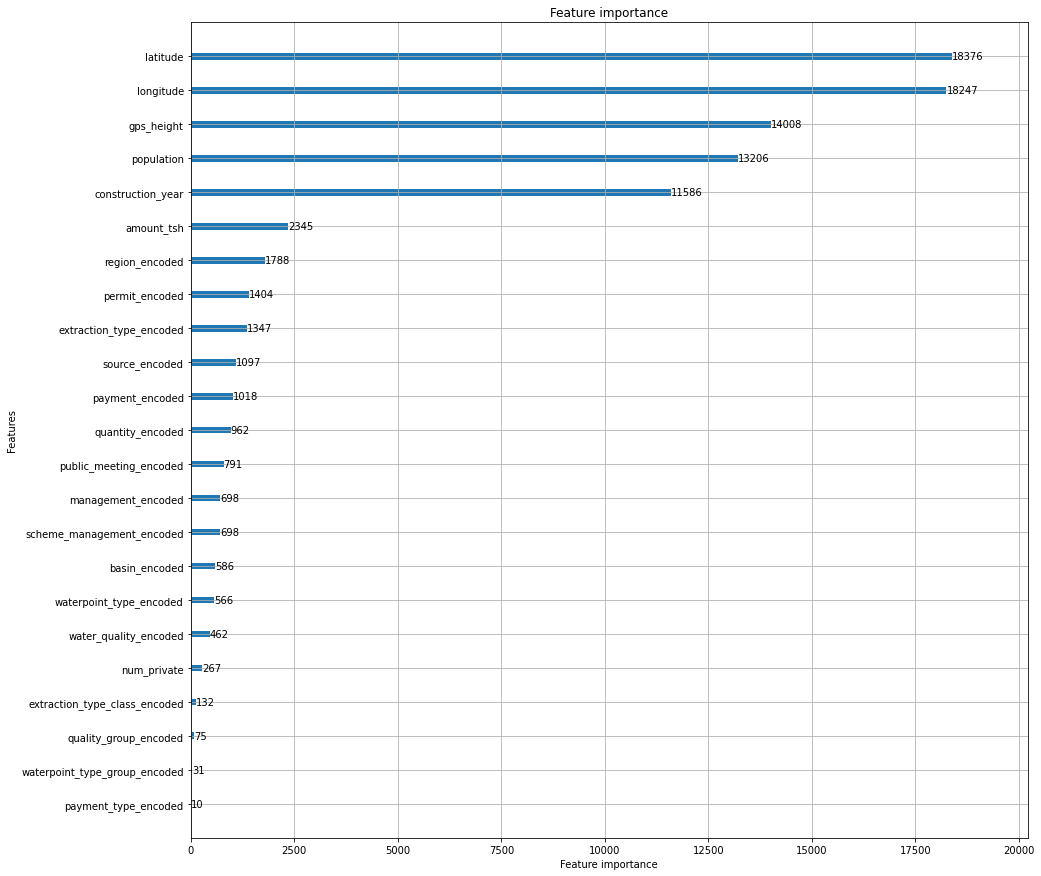

In [135]:
# Dig into the relative contribution of each feature

ax = lgb.plot_importance(model, max_num_features=40, figsize=(15,15))

##### Alright so looks like my point biserial correlation didn't fully pick up on the predictive capacity of the numeric variables on the outcome var. Apart from construction year, maybe these relationships are non linear which is why I should next develop a Python package implementing a distance-correlation equivalent of point biserial correlation or maybe even google it to see how I could detect non-linear continuous-categorical relationships.  

In [2]:
## There's a lot I didn't get time to do. In vague order of priority:
# - the cleaning tasks that I described but didn't do
# - salvage the messy categorical vars as described in a previous comment. Also the datetime var
# - More hyperparameter tuning and cross validation for the existing model
# - Develop a second model from my list of options and compare the two
# - In real life I'd look for extra and complimentary data
# - Ensemble model
# - I should have a pip requirements file or similar to make it easy for others to run these notebooks
